In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df=pd.read_csv("../Datasets_1/Nifty50/Nifty50 training.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0
...,...,...,...,...,...,...,...
2709,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
2710,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
2711,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
2712,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0


In [50]:
df.isnull().sum()

Date          0
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [51]:
df=df.dropna()
df
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [52]:
test=pd.read_csv("../Datasets_1/Nifty50/Nifty50 testing.csv")
test
test.isnull().sum()
test=test.dropna()
test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,10868.849609,10895.349609,10735.049805,10792.500000,10792.500000,309700.0
1,2019-01-03,10796.799805,10814.049805,10661.250000,10672.250000,10672.250000,286200.0
2,2019-01-04,10699.700195,10741.049805,10628.650391,10727.349609,10727.349609,296600.0
3,2019-01-07,10804.849609,10835.950195,10750.150391,10771.799805,10771.799805,269400.0
4,2019-01-08,10786.250000,10818.450195,10733.250000,10802.150391,10802.150391,277700.0
...,...,...,...,...,...,...,...
236,2019-12-23,12235.450195,12287.150391,12213.250000,12262.750000,12262.750000,604800.0
237,2019-12-24,12269.250000,12283.700195,12202.099609,12214.549805,12214.549805,470300.0
238,2019-12-26,12211.849609,12221.549805,12118.849609,12126.549805,12126.549805,520300.0
239,2019-12-27,12172.900391,12258.450195,12157.900391,12245.799805,12245.799805,383800.0


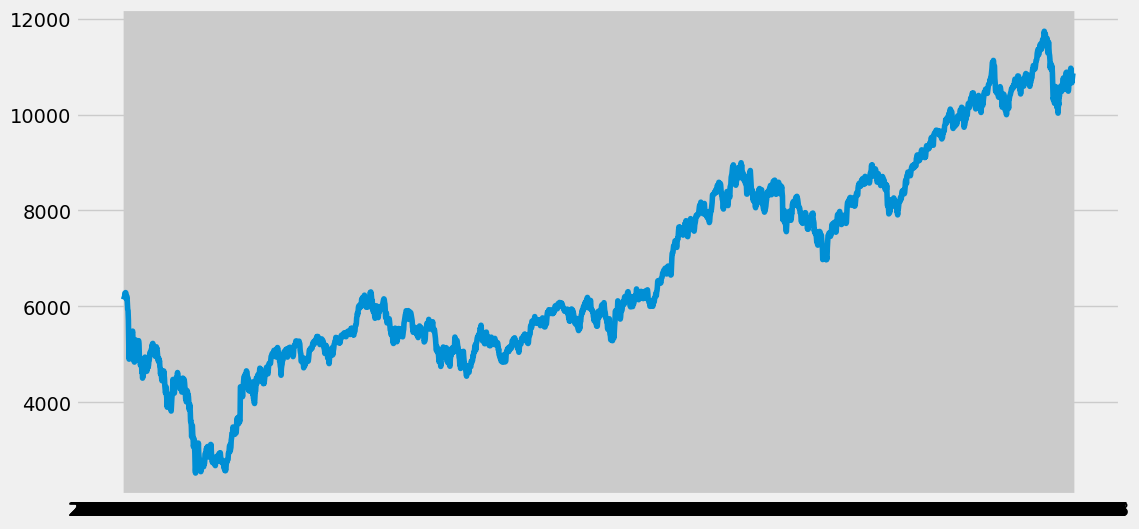

In [53]:


plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"])

<Figure size 640x480 with 0 Axes>

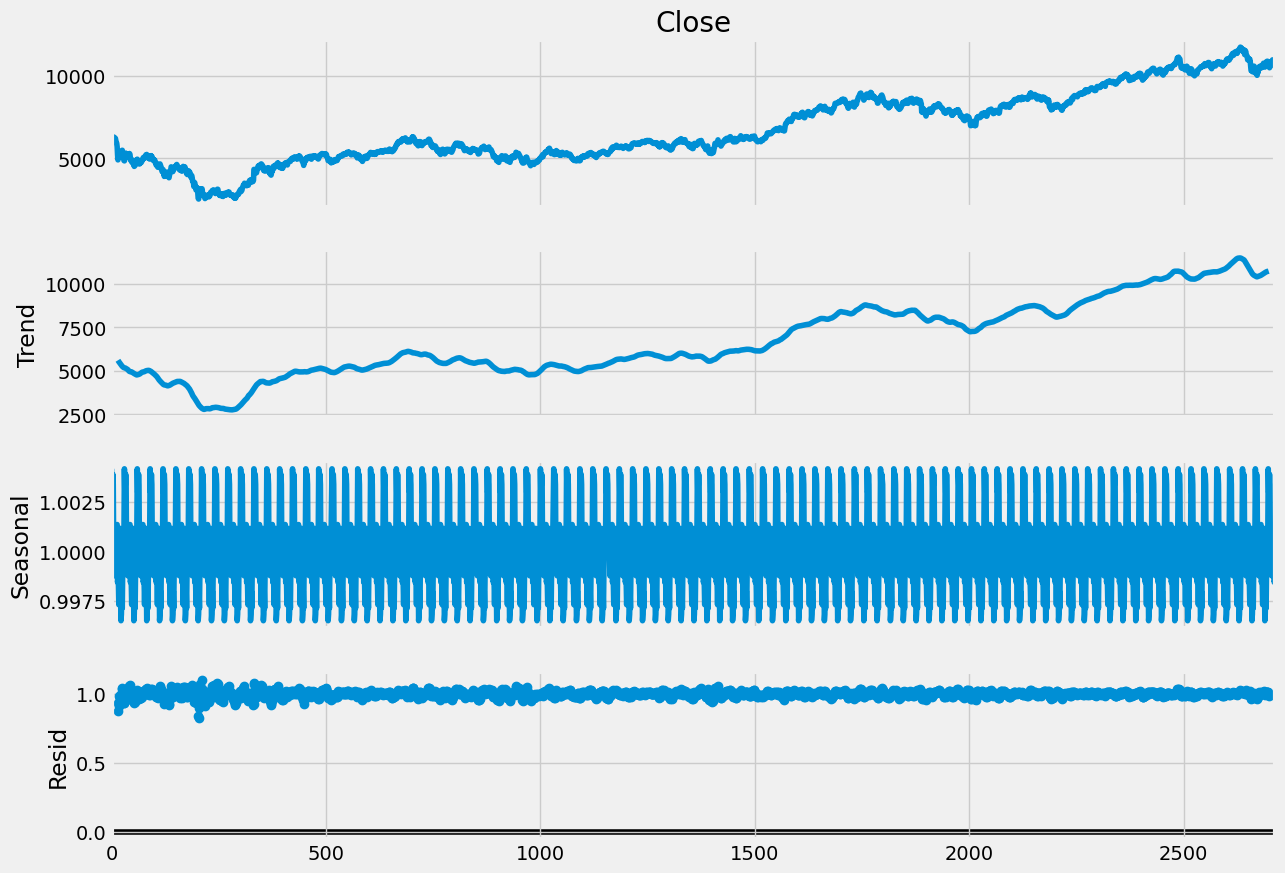

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

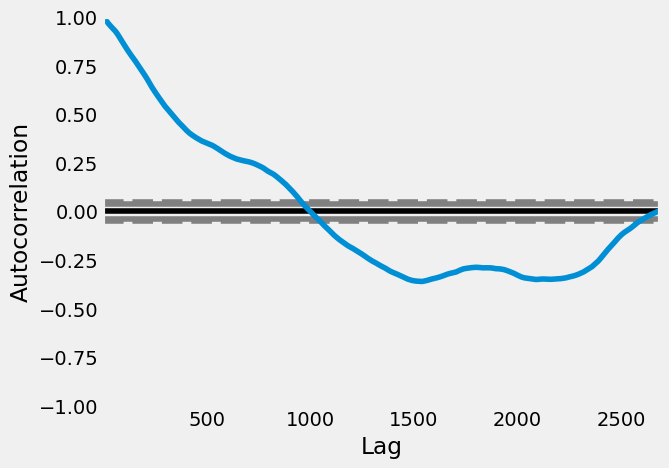

In [55]:
pd.plotting.autocorrelation_plot(df["Close"])

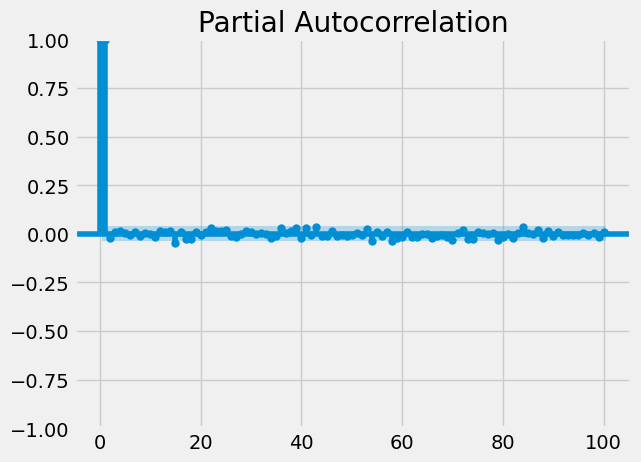

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Close"], lags = 100);

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

def arima_grid_search(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None

    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

    return best_order

# Define the ranges for p, d, and q
p_values = range(0, 4)  # adjust the range based on your data and expectations
d_values = range(0, 2)  # adjust the range based on your data and expectations
q_values = range(0, 4)  # adjust the range based on your data and expectations

best_order = arima_grid_search(df['Close'], p_values, d_values, q_values)
print(f'Best ARIMA Order: {best_order}')



C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\s

Best ARIMA Order: (3, 1, 2)


In [84]:
# Fit the ARIMA model with the best parameters

best_model = ARIMA(df['Close'], order=best_order)
best_model_fit = best_model.fit()

# # Print the best parameters and model summary
print(best_model_fit.summary())

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2687
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -15399.543
Date:                Mon, 04 Dec 2023   AIC                          30811.087
Time:                        18:38:58   BIC                          30846.462
Sample:                             0   HQIC                         30823.883
                               - 2687                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4079      0.031     45.006      0.000       1.347       1.469
ar.L2         -1.0259      0.038    -27.203      0.000      -1.100      -0.952
ar.L3          0.0456      0.016      2.845      0.0

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [85]:
predictions = best_model_fit.predict()
print(predictions)

0           0.000000
1        6146.765197
2        6182.243778
3        6178.711184
4        6280.123011
            ...     
2709    10956.976356
2710    10745.327166
2711    10655.324273
2712    10729.451383
2713    10781.116914
Name: predicted_mean, Length: 2687, dtype: float64


In [86]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Close'],
                                order=best_order,
                                seasonal_order=(3, 1, 2, 12))
model=model.fit()
print(model.summary())

C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2687
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood              -15357.625
Date:                            Mon, 04 Dec 2023   AIC                          30737.250
Time:                                    18:39:55   BIC                          30802.054
Sample:                                         0   HQIC                         30760.696
                                           - 2687                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0770      0.019      4.160      0.000       0.041       0.113
ar.L2          0.9967      0.010   

In [87]:
# Generate predictions using the SARIMAX model

# start_date = (df["Date"].iloc[-1] + pd.Timedelta(days=1)).strftime("%Y-%m-%d")
start_date = "2019-01-01"
end_date = "2019-12-31"
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

date_range = pd.date_range(start=start_date, end=end_date, freq="D")

predictions = model.predict(len(df), len(df) + len(date_range) - 1)

predictions.index = date_range

print(predictions)


2019-01-01    10881.468939
2019-01-02    10880.448862
2019-01-03    10877.826580
2019-01-04    10877.109880
2019-01-05    10883.840919
                  ...     
2019-12-27    11383.874866
2019-12-28    11382.803725
2019-12-29    11379.694837
2019-12-30    11379.297165
2019-12-31    11385.371846
Freq: D, Name: predicted_mean, Length: 365, dtype: float64


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [88]:
plt.figure(figsize=(20, 10))
plt.plot(test["Date"], test["Close"])
plt.plot(predictions, color="green")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 2000x1000 with 1 Axes>

2687    10866.550968
2688    10870.790053
2689    10873.588508
2690    10873.482928
2691    10870.656674
            ...     
2922    10868.950372
2923    10868.985967
2924    10868.997955
2925    10868.980045
2926    10868.944155
Name: predicted_mean, Length: 240, dtype: float64


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


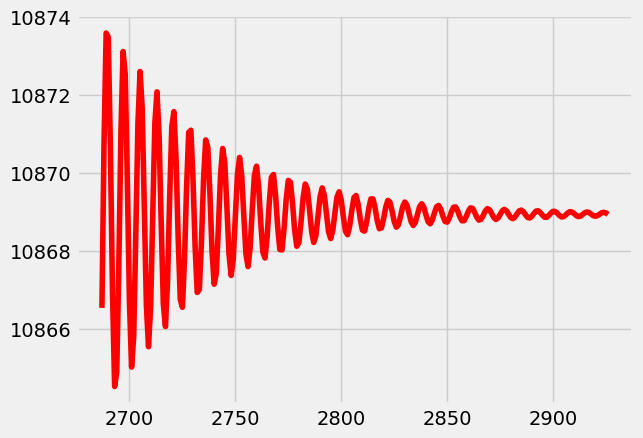

In [91]:
next_day_price=best_model_fit.forecast(240,alpha=0.05)
print(next_day_price)
plt.plot(next_day_price,color="red")

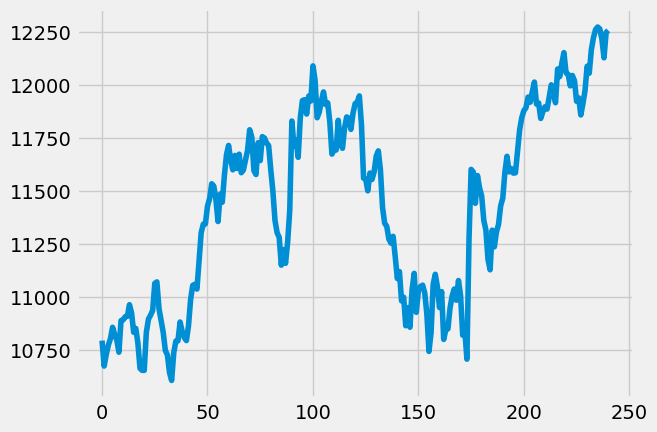

In [92]:
plt.plot(test['Close'])

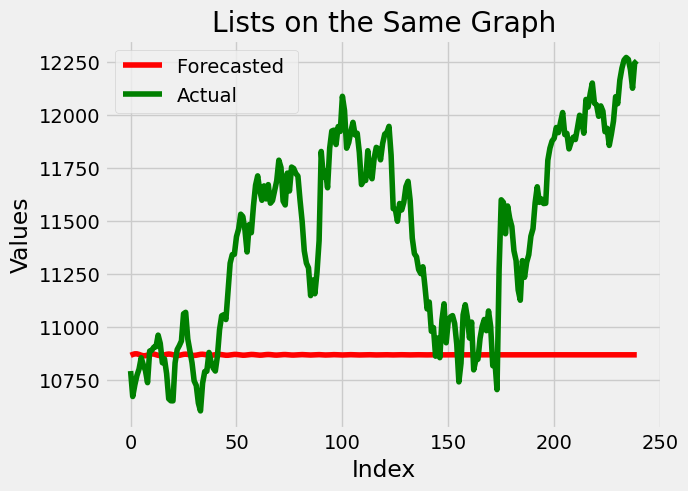

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Example lists of data
y1 = next_day_price
y2 = test['Close'].head(240)

# Generate x-values based on the length of the lists
x = np.arange(len(y1))

# Plot the first list
plt.plot(x, y1, label='Forecasted ', color='red')

# Plot the second list on the same graph
plt.plot(x, y2, label='Actual', color='green')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Lists on the Same Graph')

# Add a legend to differentiate between lists
plt.legend()

# Show the plot
plt.show()

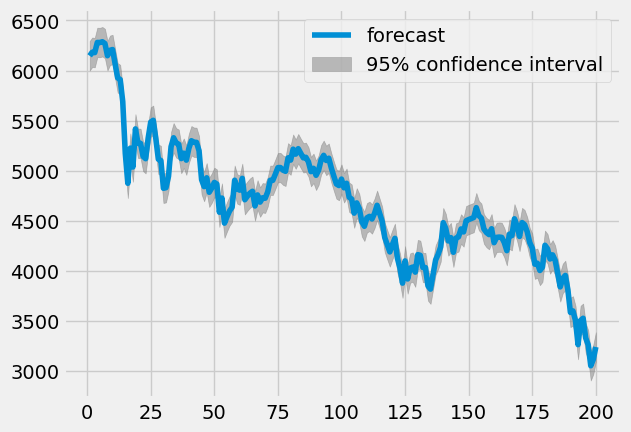

In [94]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(best_model_fit,start=1,end=200,dynamic=False,alpha=0.05);

1      6146.765197
2      6182.243778
3      6178.711184
4      6280.123011
5      6279.310796
          ...     
237    2953.503085
238    3073.622343
239    3084.526290
240    3037.539616
241    2958.628436
Name: predicted_mean, Length: 240, dtype: float64


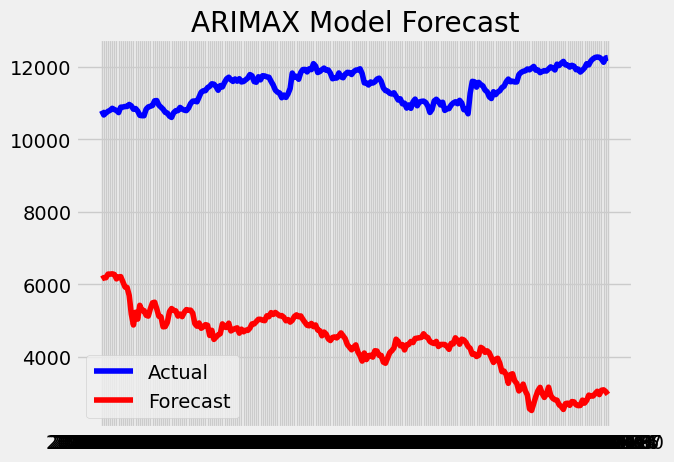

In [95]:
forecast_steps = 10  # Adjust based on your requirements
forecast = best_model_fit.get_prediction(start=1 ,end=240)
print(forecast.predicted_mean)
plt.plot(test['Date'].head(240),test['Close'].head(240), label='Actual', color='blue')
plt.plot( test['Date'].head(240),forecast.predicted_mean, label='Forecast', color='red')
# plt.fill_between(forecast.index, lower_bound, upper_bound, color='pink', alpha=0.3)
plt.title('ARIMAX Model Forecast')
plt.legend()
plt.show()

1      12346.765197
2      12382.243778
3      12378.711184
4      12480.123011
5      12479.310796
           ...     
237     9153.503085
238     9273.622343
239     9284.526290
240     9237.539616
241     9158.628436
Name: predicted_mean, Length: 240, dtype: float64


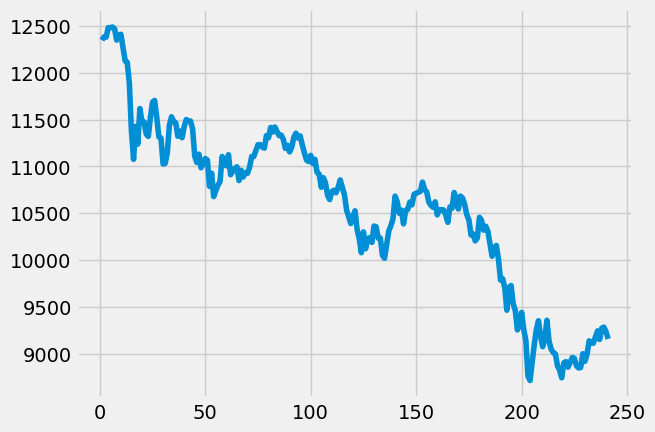

In [96]:
next_day_price=best_model_fit.get_prediction(start=1,end=240,alpha=0.05)
start_date='2019-01-01'
end_date='2019-12-31'
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

date_range = pd.date_range(start=start_date, end=end_date, freq="D")
next_day_price.index=date_range
print(next_day_price.predicted_mean+6200)
plt.plot(next_day_price.predicted_mean+6200)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


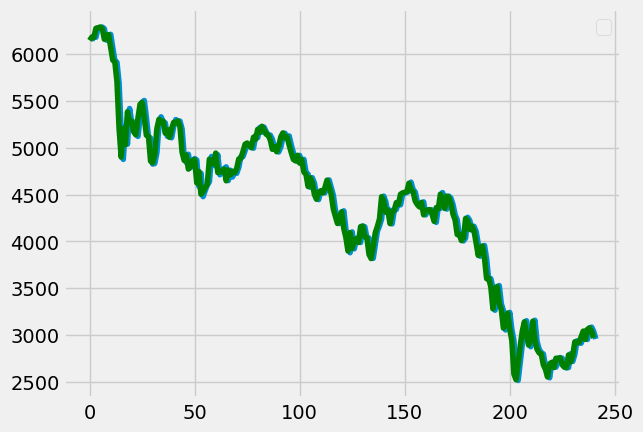

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0
1,2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0
2,2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0
3,2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0
4,2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0
...,...,...,...,...,...,...,...
2709,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
2710,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
2711,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
2712,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

final_predictions=next_day_price.predicted_mean

plt.plot(final_predictions);
plt.plot(df['Close'].head(240), color="green")
plt.legend()
plt.show()

df


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


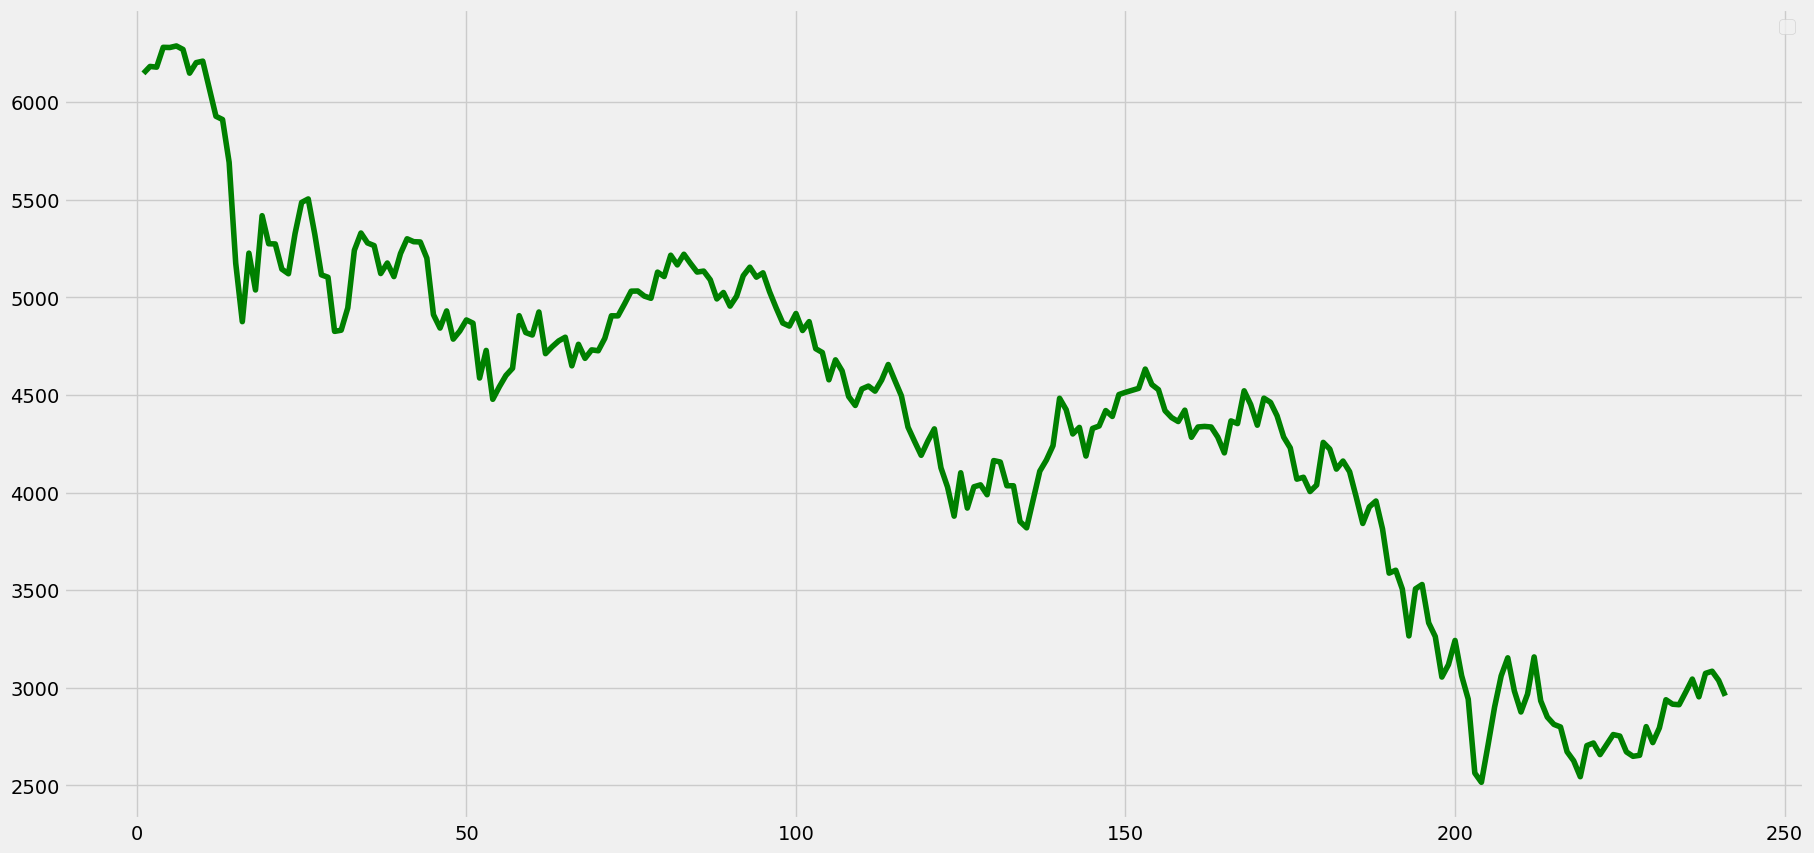

1      6146.765197
2      6182.243778
3      6178.711184
4      6280.123011
5      6279.310796
          ...     
237    2953.503085
238    3073.622343
239    3084.526290
240    3037.539616
241    2958.628436
Name: predicted_mean, Length: 240, dtype: float64

In [98]:
plt.figure(figsize=(20, 10))
# plt.plot(df["Date"], df["Close"])
plt.plot(final_predictions, color="green")
plt.legend()
plt.show()

final_predictions

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual_values = test['Close'].head(240)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, final_predictions)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, final_predictions)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 51361366.83389394
Mean Absolute Error (MAE): 7058.11419193287
Root Mean Squared Error (RMSE): 7166.684507768843


In [100]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.011426
p-value: 0.957577


In [101]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['Close'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -48.443783
p-value: 0.000000
